In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_files

reviews_train = load_files("../data/aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisio

In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english", min_df=4)
X_train = vect.fit_transform(text_train)

In [5]:
X_train.shape

(25000, 30462)

In [6]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=100)
X_lsa = lsa.fit_transform(X_train)

In [7]:
lsa.components_.shape

(100, 30462)

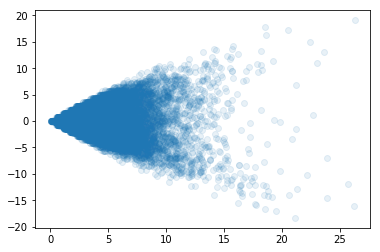

In [8]:
plt.scatter(X_lsa[:, 0], X_lsa[:, 1], alpha=.1)

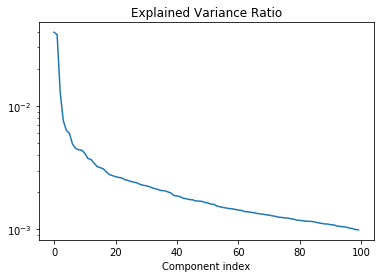

In [70]:
plt.semilogy(lsa.explained_variance_ratio_)
plt.title("Explained Variance Ratio")
plt.xlabel("Component index")
plt.savefig("images/lsa_truncated_svd_plot.png")

In [10]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(np.abs(coef))[-top_n:]
    important_coefs = coef[inds]
    sort_sign = np.argsort(important_coefs)
    myrange = range(len(inds))
    combined_inds = inds[sort_sign]

    ax.bar(myrange, coef[combined_inds])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[combined_inds], rotation=60, ha="right")

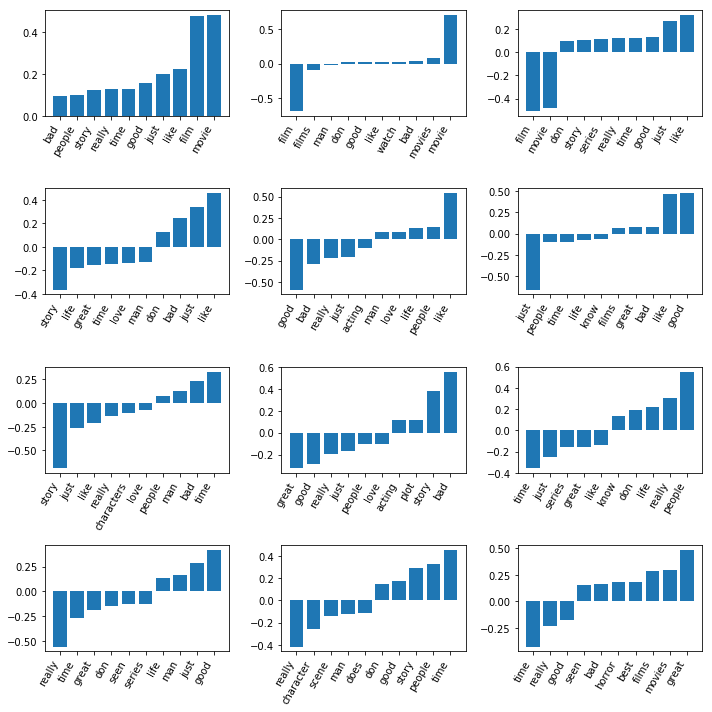

In [11]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lsa.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

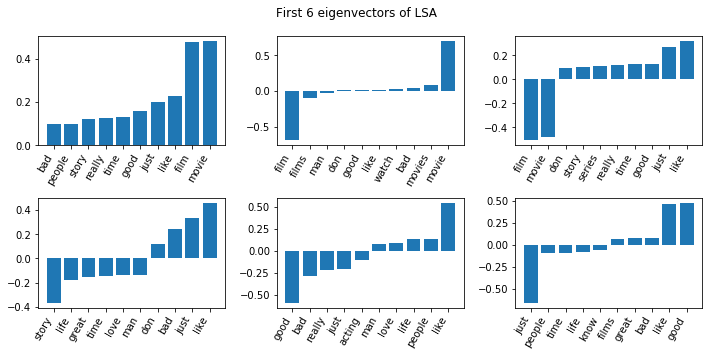

In [77]:
# Only six first
n_components = 6
fig, axes = plt.subplots(n_components // 3, 3, figsize=(10, 5))
for ax, coef in zip(axes.ravel(), lsa.components_):
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
plt.suptitle("First 6 eigenvectors of LSA")
plt.tight_layout()
plt.subplots_adjust(top=.9)
plt.savefig("images/lsa_six_eigvec.png")

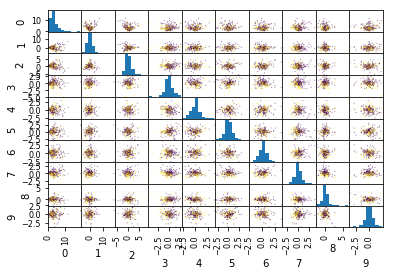

In [12]:
df = pd.DataFrame(X_lsa[::100, :10])
pd.plotting.scatter_matrix(df, c=y_train[::100], s=5);

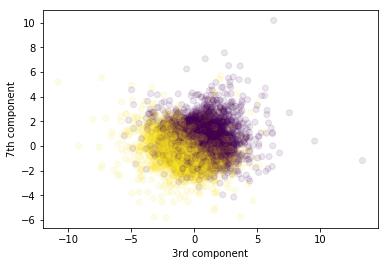

In [78]:
plt.scatter(X_lsa[:, 3], X_lsa[:, 7], alpha=.1, c=y_train)

# Trying normalizer

In [14]:
from sklearn.preprocessing import MaxAbsScaler, Normalizer
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_train)
X_normalized = Normalizer().fit_transform(X_train)

lsa_normalized = TruncatedSVD(n_components=100)
X_lsa_normalized = lsa_normalized.fit_transform(X_normalized)

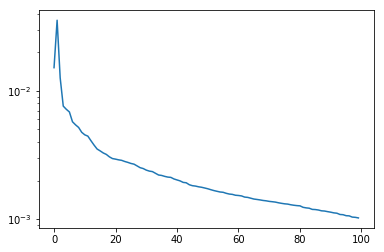

In [15]:
plt.semilogy(lsa_normalized.explained_variance_ratio_)

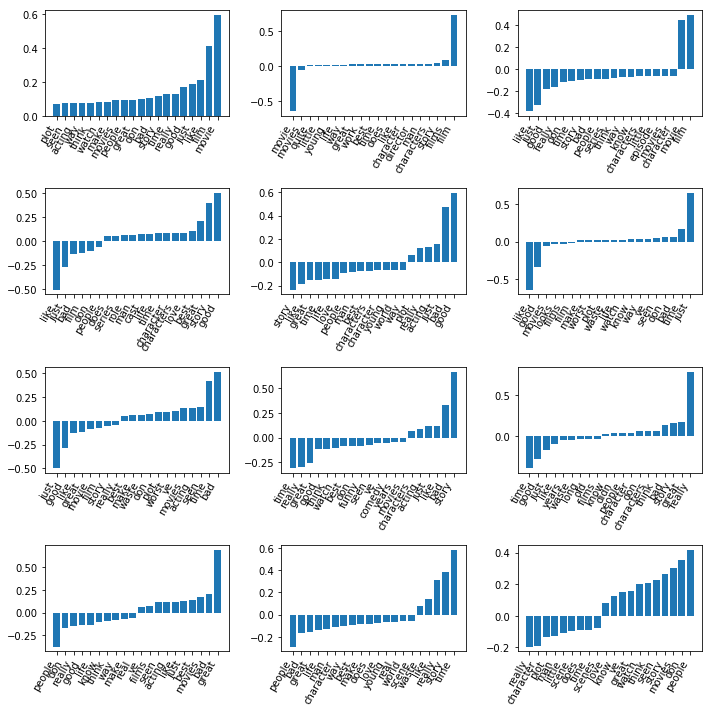

In [81]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lsa_normalized.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

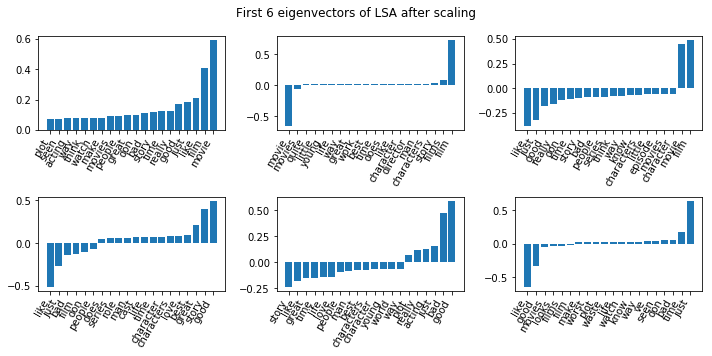

In [17]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_train)

lsa_scaled = TruncatedSVD(n_components=100)
X_lsa_scaled = lsa_scaled.fit_transform(X_scaled)

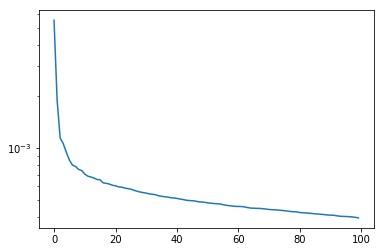

In [18]:
plt.semilogy(lsa_scaled.explained_variance_ratio_)

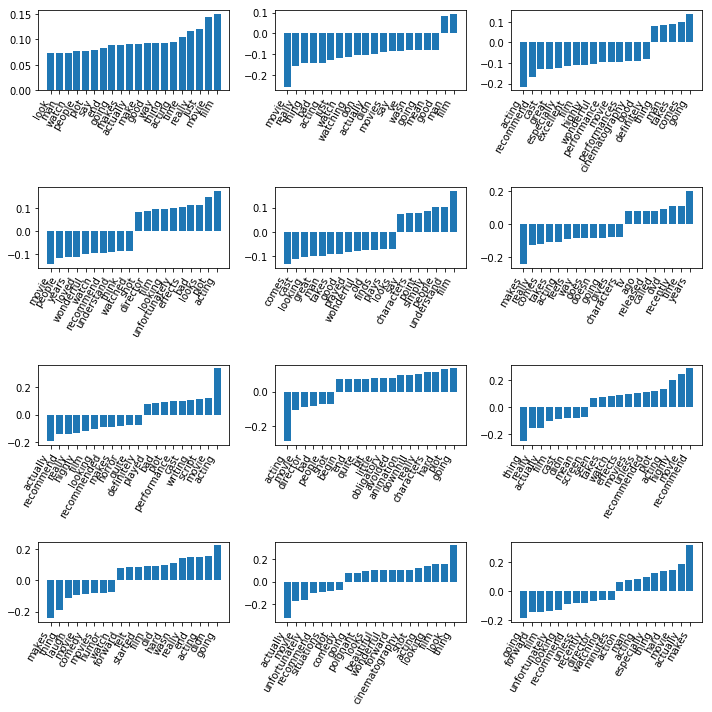

In [19]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lsa_scaled.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

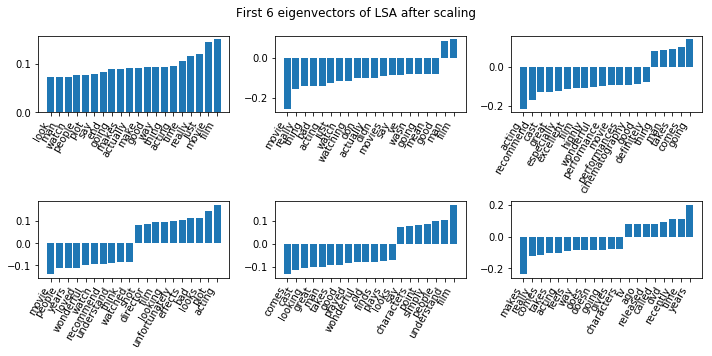

In [83]:
n_components = 6
fig, axes = plt.subplots(n_components // 3, 3, figsize=(10, 5))
for ax, coef in zip(axes.ravel(), lsa_scaled.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.suptitle("First 6 eigenvectors of LSA after scaling")
plt.tight_layout()
plt.subplots_adjust(top=.9)
plt.savefig("images/lsa_six_eigvec_scaled.png")

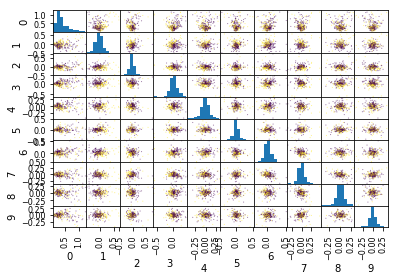

In [20]:
df_scaled = pd.DataFrame(X_lsa_scaled[::100, :10])
pd.plotting.scatter_matrix(df_scaled, c=y_train[::100], s=5);

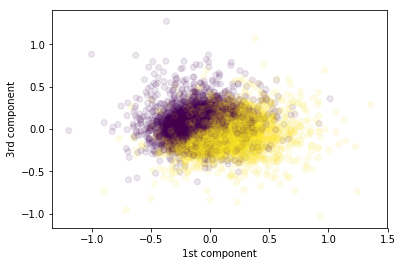

In [84]:
plt.scatter(X_lsa_scaled[:, 1], X_lsa_scaled[:, 3], alpha=.1, c=y_train)
plt.xlabel("1st component")
plt.ylabel("3rd component")
plt.savefig("images/capture_sentiment.png")

In [22]:
reviews_test = load_files("../data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]
X_test = vect.transform(text_test)

In [23]:
X_test_lsa_scaled = lsa_scaled.transform(scaler.transform(X_test))

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=.1).fit(X_train, y_train)
lr.score(X_test, y_test)

0.87263999999999997

In [25]:
lr_lsa = LogisticRegression(C=100).fit(X_lsa_scaled[:, :10], y_train)
lr_lsa.score(X_test_lsa_scaled[:, :10], y_test)

0.82696000000000003

In [26]:
lr_lsa.score(X_lsa_scaled[:, :10], y_train)

0.82779999999999998

In [27]:
lsa_scaled1k = TruncatedSVD(n_components=1000)
X_lsa_scaled1k = lsa_scaled1k.fit_transform(X_scaled)

In [28]:
X_test_lsa_scaled1k = lsa_scaled1k.transform(scaler.transform(X_test))

In [29]:
lr_lsa = LogisticRegression().fit(X_lsa_scaled1k, y_train)
lr_lsa.score(X_test_lsa_scaled1k, y_test)

0.87460000000000004

In [30]:
lr_lsa.score(X_lsa_scaled1k, y_train)

0.89171999999999996

# NMF

In [31]:
from sklearn.decomposition import NMF
nmf_scale = NMF(n_components=100, verbose=10, tol=0.01)
nmf_scale.fit(X_scaled)

violation: 1.0
violation: 0.37225587006059846
violation: 0.418855548667175
violation: 0.3258080740659776
violation: 0.26685525899578283
violation: 0.22105970355529253
violation: 0.1895624860676993
violation: 0.16015791967605436
violation: 0.13090672902898853
violation: 0.10643161458746465
violation: 0.08801211105200052
violation: 0.07313041722387519
violation: 0.060755190676986495
violation: 0.05121531943153641
violation: 0.04393073868819797
violation: 0.03832811385658845
violation: 0.033839076952543415
violation: 0.03013288524071018
violation: 0.02695483683064347
violation: 0.024368450036624627
violation: 0.022138691839238122
violation: 0.020440059946781847
violation: 0.019107692311786193
violation: 0.01820711676496219
violation: 0.017600765309652135
violation: 0.01730714617007345
violation: 0.017183978454243465
violation: 0.01714958234770423
violation: 0.017299868466240816
violation: 0.017492262103194732
violation: 0.01767861676244439
violation: 0.017863084877781824
violation: 0.0179

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=100, random_state=None, shuffle=False, solver='cd',
  tol=0.01, verbose=10)

In [32]:
X_nmf_scale = nmf_scale.transform(X_scaled)

violation: 1.0
violation: 0.5130136551178531
violation: 0.06714610062971532
violation: 0.01633605755513647
violation: 0.004210153099110559
Converged at iteration 5


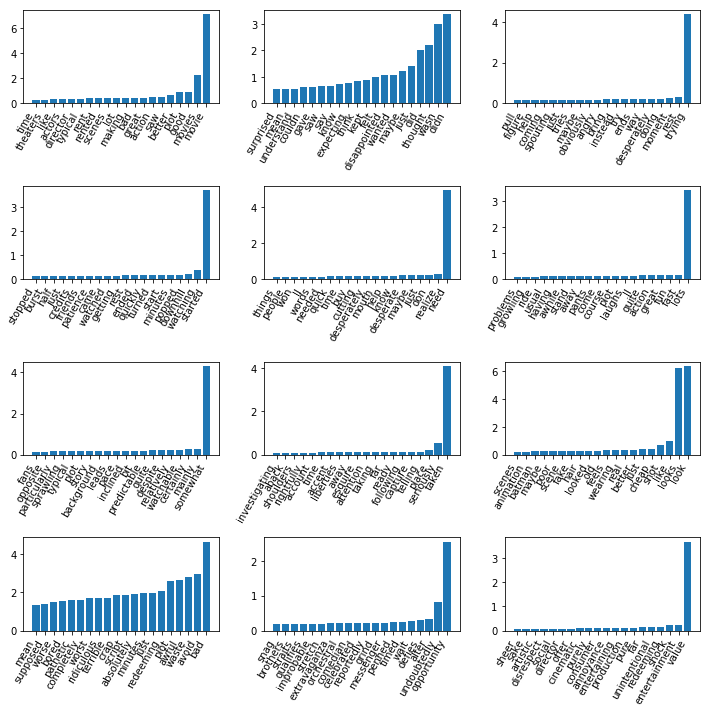

In [33]:
large_comp_inds = np.argsort(X_nmf_scale.mean(axis=0))[-12:][::-1]

feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), nmf_scale.components_[large_comp_inds, :]):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

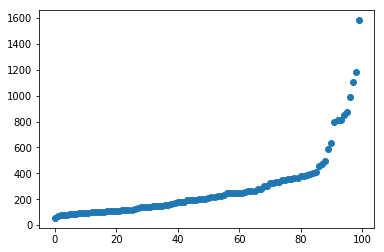

In [41]:
plt.plot(np.sort(nmf_scale.components_.sum(axis=1)), "o")

In [38]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=100, verbose=10, tol=0.01)
X_nmf_noscale = nmf.fit_transform(X_train)

violation: 1.0
violation: 0.4083317712585803
violation: 0.34649095922659595
violation: 0.2526206942873234
violation: 0.18066083019529244
violation: 0.13818059722033013
violation: 0.11415555336416947
violation: 0.09449040387883248
violation: 0.07449027247891447
violation: 0.057357290360717725
violation: 0.04393916224549819
violation: 0.03482562380246948
violation: 0.026682888802867673
violation: 0.019968145770383663
violation: 0.015616331712659949
violation: 0.012705362352280623
violation: 0.010748318067997347
violation: 0.0093516151335175
Converged at iteration 18


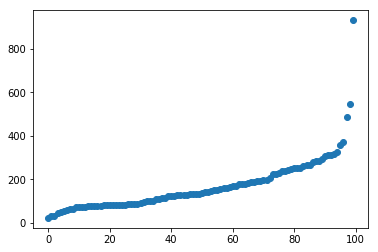

In [39]:
plt.plot(np.sort(nmf.components_.sum(axis=1)), "o")

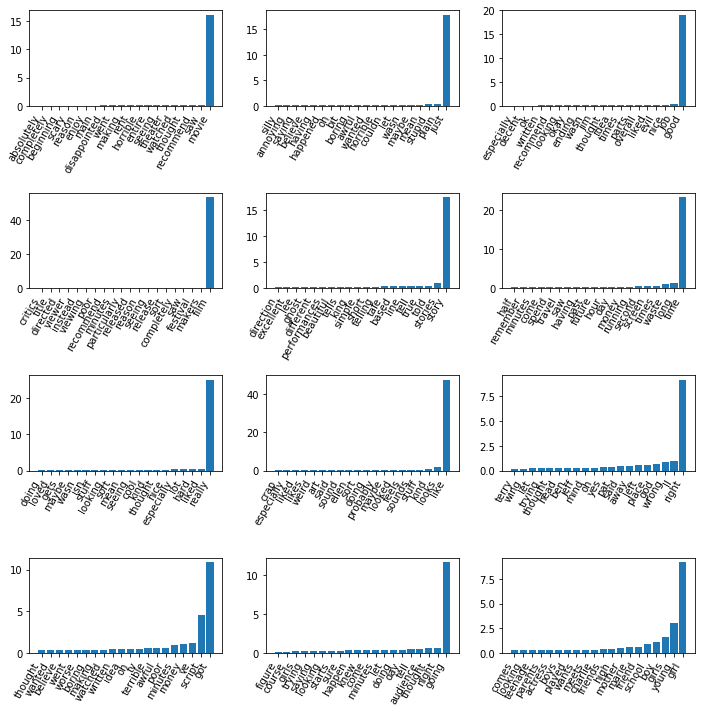

In [45]:
large_comp_inds = np.argsort(X_nmf_noscale.mean(axis=0))[-12:][::-1]

feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), nmf.components_[large_comp_inds, :]):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

In [46]:
def print_topics(topics, feature_names, components, topics_per_chunk=6,
                 n_words=20):
    sorting = np.argsort(components, axis=1)[:, ::-1]
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")


In [47]:
sorting = np.argsort(nmf.components_, axis=1)[:, ::-1]
print_topics(large_comp_inds, feature_names, sorting)

topic 1       topic 5       topic 4       topic 0       topic 6       topic 10      
--------      --------      --------      --------      --------      --------      
armstrong     beryl         beheaded      chick         burst         ebay          
stared        squabble      stark         snarls        spell         sneezing      
polar         pompeo        policeman     portuguese    preoccupied   prance        
polanski      pomp          police        portugal      preoccupationsprakash       
poland        pommel        poles         portrays      preoccupation praising      
pol           pom           polemic       portraying    premonition   praiseworthy  
pokémon       polynesia     pole          portrayed     premium       praises       
poking        polygraph     poldi         portrayals    premises      praised       
pokes         polygamy      polarizing    portrayal     action        praise        
poker         polyester     polarized     portray       premise  

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
X_tfidf = TfidfTransformer().fit_transform(X_train)
from sklearn.decomposition import NMF
nmf_tfidf = NMF(n_components=100, verbose=10, tol=0.01)
X_nmf_tfidf = nmf_tfidf.fit_transform(X_tfidf)

violation: 1.0
violation: 0.3255703704523351
violation: 0.4016352929229556
violation: 0.34483436511691495
violation: 0.24832730207862005
violation: 0.16721602510295683
violation: 0.1239415315073525
violation: 0.1013033835406065
violation: 0.07573887696810873
violation: 0.05547783015261559
violation: 0.04414802094746191
violation: 0.03724605584527303
violation: 0.0322557450371324
violation: 0.02873394844999514
violation: 0.025884852134582952
violation: 0.023418529661780756
violation: 0.02126698098476965
violation: 0.019173375508350448
violation: 0.0171403253679487
violation: 0.015302982259107768
violation: 0.013622831002276809
violation: 0.012050681331178724
violation: 0.010693810041687719
violation: 0.009510479971969545
Converged at iteration 24


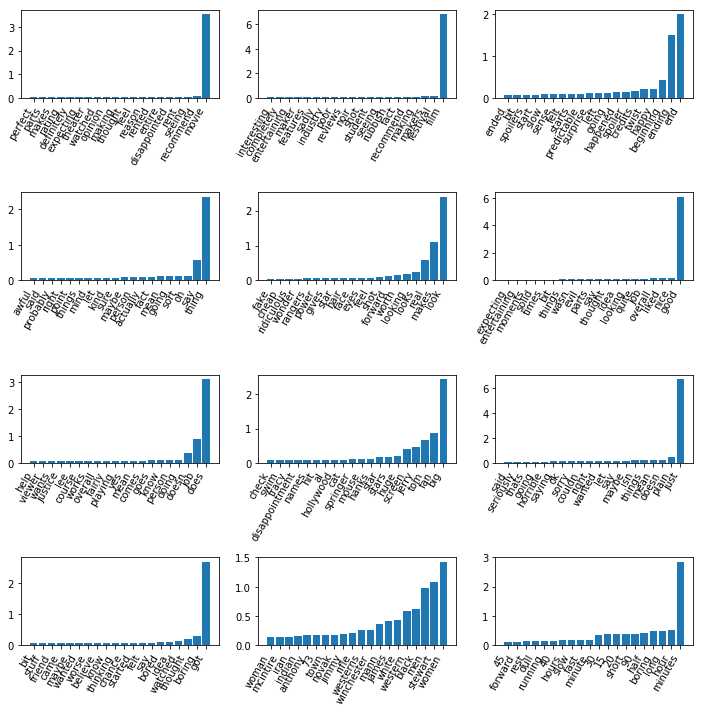

In [52]:
large_comp_inds = np.argsort(X_nmf_tfidf.mean(axis=0))[-12:][::-1]

feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), nmf_tfidf.components_[large_comp_inds, :]):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer
X_tfidf = TfidfTransformer().fit_transform(X_train)
from sklearn.decomposition import NMF
nmf10 = NMF(n_components=10, verbose=10, tol=0.001)
X_nmf_tfidf10 = nmf10.fit_transform(X_tfidf)

violation: 1.0
violation: 0.49155217137876306
violation: 0.3407306734057308
violation: 0.261653352876434
violation: 0.21238845341689863
violation: 0.18280902656506096
violation: 0.16518691343403616
violation: 0.14472913256491718
violation: 0.12425686412022341
violation: 0.10596951490402375
violation: 0.09075691777587916
violation: 0.07816791760964521
violation: 0.06757996675047745
violation: 0.05834793333307855
violation: 0.050625404500122956
violation: 0.04327739229048805
violation: 0.037097848866783
violation: 0.032555847327815295
violation: 0.028734928554948937
violation: 0.02554164676745438
violation: 0.022862593194940384
violation: 0.020600294594847905
violation: 0.018721855412399454
violation: 0.017102405525172573
violation: 0.015689422845862982
violation: 0.014527775246429888
violation: 0.013607352520542463
violation: 0.012854101908597048
violation: 0.012220913409892311
violation: 0.011684444177233503
violation: 0.0112369038948219
violation: 0.010838704982902798
violation: 0.010

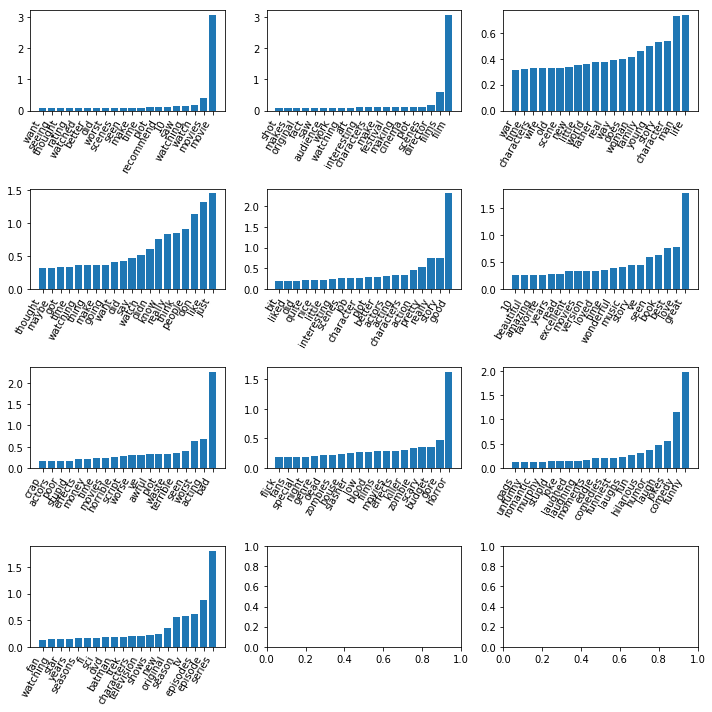

In [54]:
large_comp_inds = np.argsort(X_nmf_tfidf10.mean(axis=0))[-12:][::-1]

feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), nmf10.components_[large_comp_inds, :]):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

In [55]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch")
X_lda = lda.fit_transform(X_train)

/home/andy/checkout/scikit-learn/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


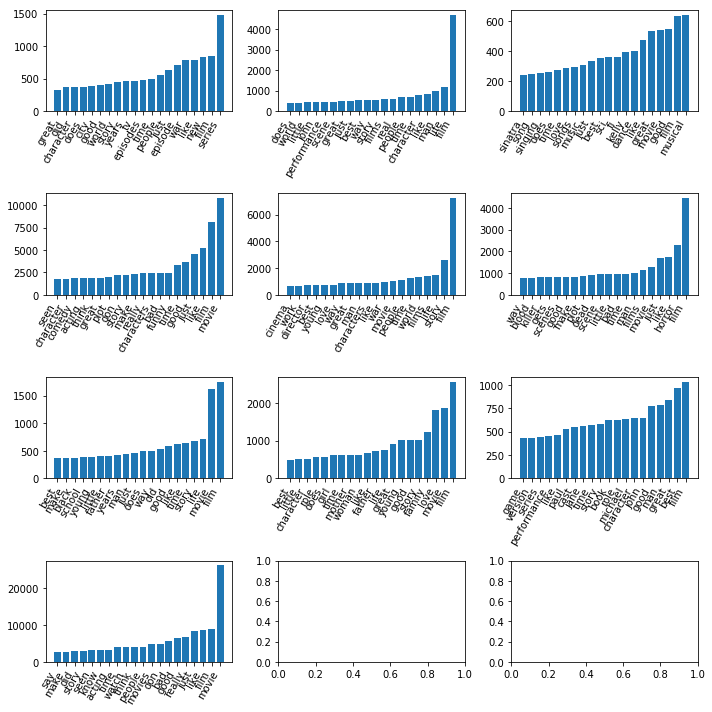

In [57]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 10))
for ax, coef in zip(axes.ravel(), lda.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

In [58]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch")
X_lda100 = lda100.fit_transform(X_train)

/home/andy/checkout/scikit-learn/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


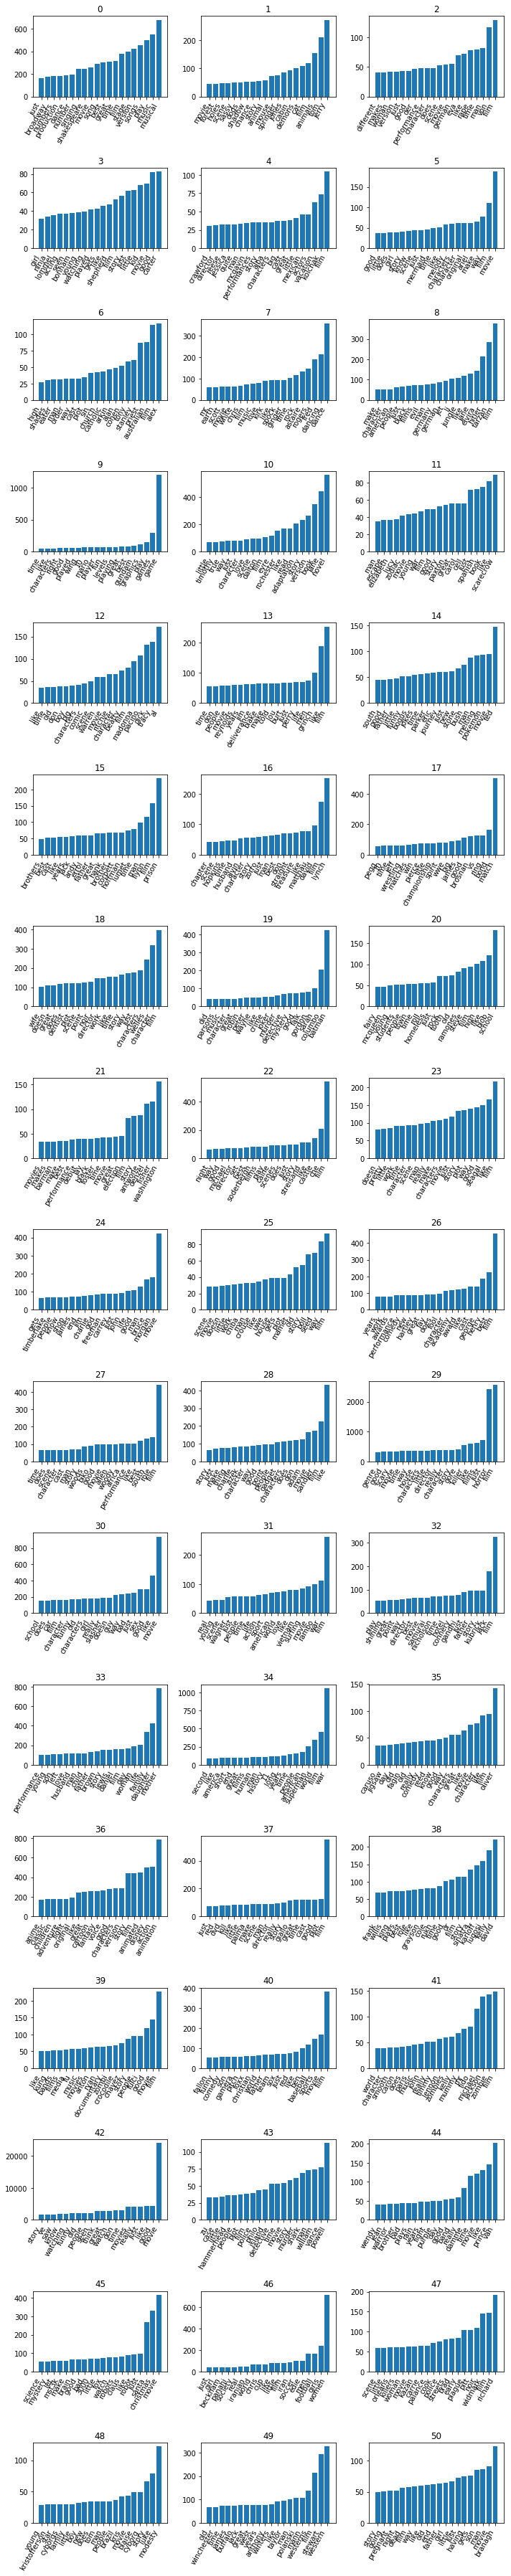

In [63]:
large_comp_inds = np.argsort(X_lda100.mean(axis=0))[-50:][::-1]

feature_names = np.array(vect.get_feature_names())
n_components = 50
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(10, 50))
for i, (ax, coef) in enumerate(zip(axes.ravel(), lda100.components_[:, :])):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    ax.set_title(i)
    
plt.tight_layout()

# FIXME SOMETHING REALLY WRONG HERE!

In [60]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
print_topics(np.argsort(X_lda100.sum(axis=0))[::-1][:30], feature_names, sorting, topics_per_chunk=8)

topic 42      topic 80      topic 61      topic 29      topic 52      topic 86      topic 30      topic 60      
--------      --------      --------      --------      --------      --------      --------      --------      
executing     merle         mao           grabbing      lodgings      matinée       mayhem        maintaining   
tambor        surfeit       tambor        shyster       spice         suicidal      su            talents       
booby         rafters       prowess       recklessly    prepubescent  purported     putting       pronto        
projector     raft          provoking     reckless      preppy        purple        puts          pronouncing   
projections   rafiki        provokes      reciting      prepping      purity        putrid        pronounces    
projectionist raffy         provoked      recites       preppie       puritanical   putain        pronounced    
projection    raffin        provoke       recite        preposterouslypuritan       pussy       

In [61]:
np.argsort(X_lda100.sum(axis=0))

array([ 6, 67, 93, 84, 48, 25, 72, 19, 46, 94, 21, 79, 41, 43, 55, 83, 12,
        4,  9, 92, 62, 11, 78,  2, 17, 15, 63, 58, 14, 16, 76,  3,  5, 20,
       54, 88,  1, 59,  7, 99, 82, 35, 44, 96, 47, 89, 77, 38, 90, 53, 74,
       50, 31, 13, 45, 40, 51, 39, 71,  8, 64, 32, 98, 49, 56, 81, 24, 10,
       27, 69, 28, 57, 22, 87, 91, 66, 65, 33, 85, 23, 26, 97, 95, 37, 73,
       18, 70, 34, 68, 36,  0, 75, 60, 30, 86, 52, 29, 61, 80, 42])